In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

df = pd.read_csv('Manaus.csv', sep=';', encoding='latin-1')

c:\users\luiz fabio\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (15,21,23,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
df.head()
pd.set_option('display.max_rows', None)

In [21]:
teste = df.loc[df['_classificacao'] == 'Confirmado']

In [12]:
numero_bairros = teste['_bairro'].value_counts().size

#TOP 10 bairros com mais casos
bairros = teste['_bairro'].value_counts().head(10)

bairros_outros = teste['_bairro'].value_counts()[10:].sum()

In [13]:
bairros_nome = bairros.index

In [16]:
list_of_tuples = list(zip(bairros_nome, bairros))  

bairros_casos = pd.DataFrame(list_of_tuples, columns = ['Bairros', 'Casos'])

bairros_casos.loc[len(bairros_casos)] = ['OUTROS',bairros_outros]

bairros_casos

,Bairros,Casos
0,CIDADE NOVA,2114
1,FLORES,1314
2,SAO JOSE OPERARIO,1210
3,JORGE TEIXEIRA,1155
4,CENTRO,1129
5,PETROPOLIS,1098
6,COMPENSA,1029
7,NOVO ALEIXO,1012
8,COROADO,996
9,ALVORADA,941


In [7]:
soma_de_casos = bairros_casos['Casos'].sum()

for i in range(11):
    porcentagem = (bairros_casos['Casos'][i]/37769)*100
    
    bairros_casos['Casos'][i] = porcentagem


<ipython-input-7-1d881e5da95c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bairros_casos['Casos'][i] = porcentagem


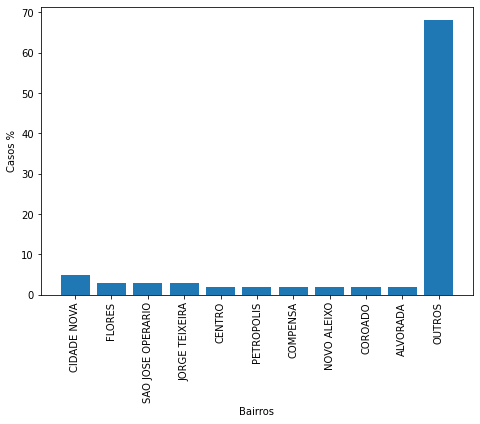

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(bairros_casos['Bairros'], bairros_casos['Casos'])
plt.xticks(bairros_casos['Bairros'],rotation=90)
ax.set_xlabel('Bairros')
ax.set_ylabel('Casos %')

plt.show()

In [10]:
bairros_casos

,Bairros,Casos
0,CIDADE NOVA,5
1,FLORES,3
2,SAO JOSE OPERARIO,3
3,JORGE TEIXEIRA,3
4,CENTRO,2
5,PETROPOLIS,2
6,COMPENSA,2
7,NOVO ALEIXO,2
8,COROADO,2
9,ALVORADA,2
